c:\Users\test\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


([<matplotlib.patches.Wedge at 0x1b52d335cd0>,
 [Text(0.5447886197087486, 1.0692078188246832, '민간체육시설'),
  Text(-1.0978293989430645, 0.06906960848527927, '공공체육시설'),
  Text(-0.20611945413751406, -1.080515974257694, '기타'),
  Text(0.6741977818040064, -0.8691704959388334, '기타체육시설'),
  Text(1.0095301050222132, -0.43686264094545685, '학교체육시설'),
  Text(1.0913261766736644, -0.13786651553891585, '자가시설'),
  Text(1.0994572176396824, -0.034551795611921995, '직장체육시설')],
 [Text(0.31779336149676995, 0.6237045609810652, '35.0%'),
  Text(-0.598816035787126, 0.03767433190106142, '28.0%'),
  Text(-0.11242879316591675, -0.5893723495951056, '18.0%'),
  Text(0.36774424462036703, -0.47409299778481817, '9.0%'),
  Text(0.5506527845575708, -0.23828871324297643, '7.0%'),
  Text(0.5952688236401805, -0.07519991756668137, '2.0%'),
  Text(0.5997039368943722, -0.01884643397013927, '1.0%')])

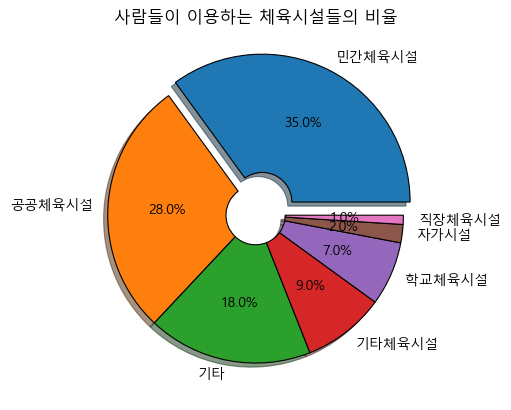

In [52]:
import matplotlib.pyplot as plt #1페이지
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False #한글 사용


physicla_data=pd.read_csv("2022년 국민생활체육조사_샘플데이터.csv") #샘플 데이터 읽어오기
physicla_table=pd.read_csv("2022년 국민생활체육조사 코드북.csv") 
physicla_var=pd.read_excel("자주_이용하는_세부체육시설_민간체육시설_상위_5개_시설__20240116152454.xlsx",index_col=0) 


new_columns=physicla_table['내용']
physicla_data.columns=new_columns #읽기 쉬운 columns 로 변경

grade=physicla_data['최종학력'] #학력 
income=physicla_data['월평균가구소득 (만원)'] #소득
own_place=physicla_data['자주 이용하는 체육시설 유형'] #체육 시설

# 목차

own_value=own_place.value_counts() #이용 체육시설 값 읽기
wedgeprops={'width':0.8,'edgecolor':'k','linewidth':0.8} #pie 만들기 조건
plt.title('사람들이 이용하는 체육시설들의 비율')
plt.pie(own_value,labels=own_value.index,explode=[0.1,0,0,0,0,0,0],
        autopct='%.1f%%',wedgeprops=wedgeprops,shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}) 
#이용 체육시설 중에 민간 체육시설의 퍼센트 확인

([<matplotlib.patches.Wedge at 0x1b5374d03d0>,
 [Text(0.26531826309091083, 1.1703017641917928, '체력단련장'),
  Text(-1.099082592673323, -0.04491608267075784, '수영장'),
  Text(-0.603126794779348, -0.9199119900399115, '골프연습장'),
  Text(0.33706896953158755, -1.047083812203643, '볼링장'),
  Text(1.0065178233216119, -0.4437587986011375, '당구장')],
 [Text(0.1547689868030313, 0.682676029111879, '42.9%'),
  Text(-0.5994995960036307, -0.024499681456777, '15.5%'),
  Text(-0.3289782516978262, -0.5017701763854062, '14.7%'),
  Text(0.18385580156268408, -0.5711366248383507, '13.7%'),
  Text(0.5490097218117882, -0.2420502537824386, '13.2%')])

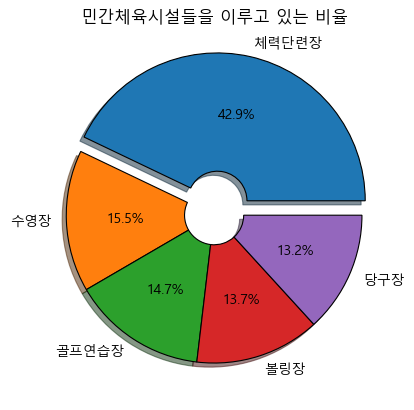

In [53]:
A=list(physicla_var.values[1]) # 2-1
A.remove('소계')
B=list(physicla_var.values[0])
B.remove('통계분류(2)')

wedgeprops={'width':0.8,'edgecolor':'k','linewidth':0.8} #pie 만들기 조건
plt.title('민간체육시설들을 이루고 있는 비율')
plt.pie(A,labels=B,autopct='%.1f%%',wedgeprops=wedgeprops,shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},explode=[0.1,0,0,0,0]) 

<Axes: title={'center': '학력별 민간체육시설 이용률'}, xlabel='최종학력', ylabel='percent'>

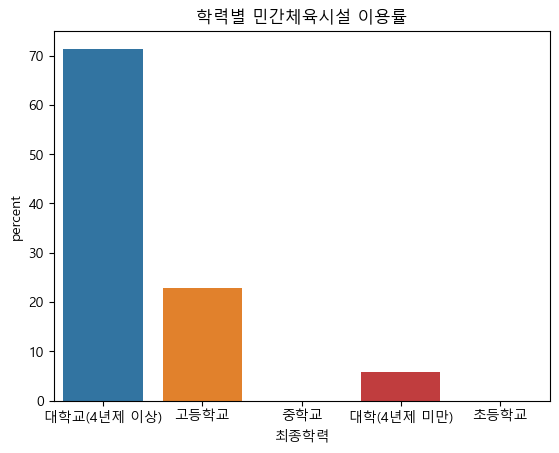

In [37]:
new_df_2=pd.DataFrame([own_place,grade]) # 2-2
grade_val=grade.value_counts() #grade 값 세기
private_user=0
by_grade=grade_val.index # x index로 들어갈 변수 - grade_val 의 index
R=list(0 for _ in by_grade) # 민간 체육 시설 이용자 수를 담아둘 변수

for j in range(5):
  for i in range(100):
    if new_df_2[i][1]==by_grade[j] and new_df_2[i][0]=='민간체육시설': # index 가 같고 민간체육시설을 이용할 때
      R[j]+=1 #count
      private_user=private_user+1

y_result=list(0 for  _ in range(5)) #y결과 도출 (해당 학력 구간 민간체육시설 이용자/민간체육시설 총 이용자)
for u in range(5):
  y_result[u]=(R[u]/private_user) *100
  

plt.title('학력별 민간체육시설 이용률')
plt.ylabel('percent')
sns.barplot(x=by_grade,y=y_result)

<Axes: title={'center': '소득별 민간체육시설 이용률'}, ylabel='percent'>

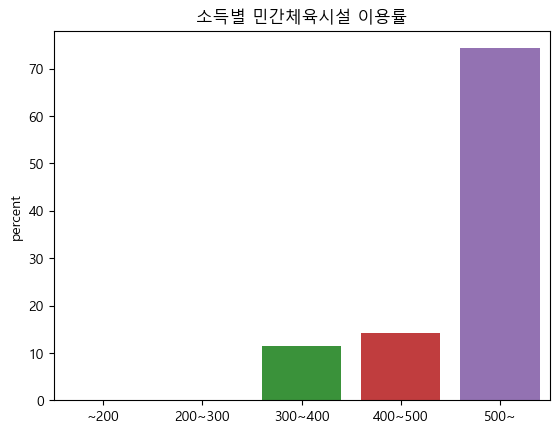

In [51]:
new_df_1=pd.DataFrame([own_place,income]) #2-4
income_val=income.value_counts()
x_by_income=['~200','200~300','300~400','400~500','500~'] # x index
T=list(0 for _ in range(5))

for i in range(100):
  if  new_df_1[i][1]<=200 and new_df_1[i][0]=='민간체육시설': # 해당 금액 범위 내 민간 체육시설 이용객 카운팅
    T[0]+=1
  elif new_df_1[i][1]<=300 and new_df_1[i][0]=='민간체육시설':
    T[1]+=1
  elif new_df_1[i][1]<=400 and new_df_1[i][0]=='민간체육시설':
    T[2]+=1
  elif new_df_1[i][1]<=500 and new_df_1[i][0]=='민간체육시설':
    T[3]+=1
  elif new_df_1[i][0]=='민간체육시설':
    T[4]+=1

y_result=list(0 for  _ in range(5))
for u in range(5):
  y_result[u]=(T[u]/private_user) *100
  
plt.title('소득별 민간체육시설 이용률')  
plt.ylabel('percent')

sns.barplot(x=x_by_income,y=y_result)